Dataset Shape: (20640, 9)

Skewness BEFORE:

AveOccup       97.639561
AveBedrms      31.316956
AveRooms       20.697869
Population      4.935858
MedInc          1.646657
MedHouseVal     0.977763
Latitude        0.465953
HouseAge        0.060331
Longitude      -0.297801
dtype: float64

===== BEFORE POWER TRANSFORMER =====
R2: 0.575787706032451
RMSE: 0.7455813830127763

===== AFTER POWER TRANSFORMER =====
R2: 0.6061331235644914
RMSE: 0.718419578737098

Skewness AFTER:

Latitude      0.151821
Population    0.110647
Longitude     0.000000
MedInc       -0.002324
AveOccup     -0.111761
HouseAge     -0.113003
AveRooms     -0.166742
AveBedrms    -1.480547
dtype: float64


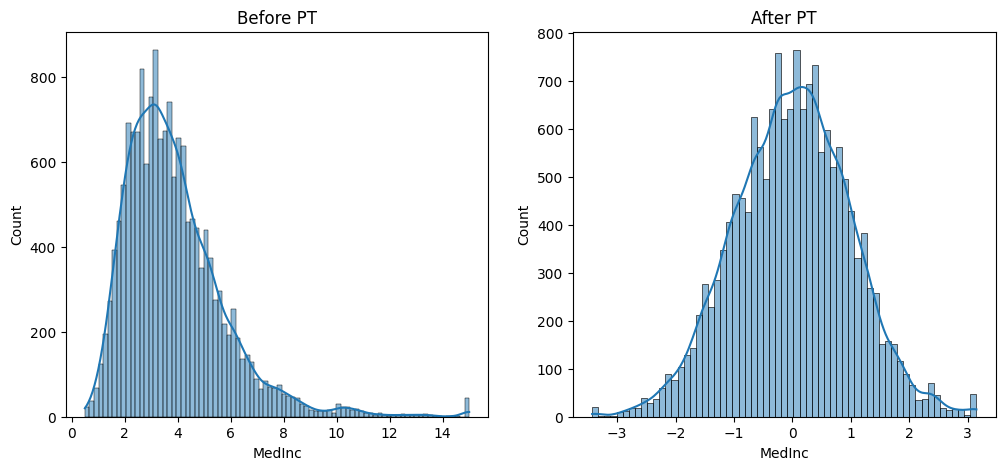

In [99]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


# ===============================
# 2. LOAD DATASET
# ===============================

data = fetch_california_housing(as_frame=True)

df = data.frame

print("Dataset Shape:", df.shape)
df.head()


# ===============================
# 3. SELECT NUMERIC COLUMNS
# ===============================

num_cols = df.columns
df_num = df[num_cols]


# ===============================
# 4. REPLACE ZERO VALUES
# ===============================

df_num = df_num.replace(0, 0.001)


# ===============================
# 5. CHECK SKEWNESS (BEFORE)
# ===============================

skew_before = df_num.skew().sort_values(ascending=False)

print("\nSkewness BEFORE:\n")
print(skew_before)


# ===============================
# 6. DEFINE X AND y
# ===============================

X = df_num.drop("MedHouseVal", axis=1)
y = df_num["MedHouseVal"]


# ===============================
# 7. TRAIN TEST SPLIT
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ===============================
# 8. LINEAR REGRESSION (BEFORE PT)
# ===============================

pipe_before = Pipeline([

    ("scaler", StandardScaler()),
    ("model", LinearRegression())

])

pipe_before.fit(X_train, y_train)

y_pred_before = pipe_before.predict(X_test)


# ===============================
# 9. EVALUATION (BEFORE)
# ===============================

r2_before = r2_score(y_test, y_pred_before)
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))

print("\n===== BEFORE POWER TRANSFORMER =====")
print("R2:", r2_before)
print("RMSE:", rmse_before)


# ===============================
# 10. APPLY POWER TRANSFORMER
# ===============================

pipe_after = Pipeline([

    ("power", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())

])

pipe_after.fit(X_train, y_train)

y_pred_after = pipe_after.predict(X_test)


# ===============================
# 11. EVALUATION (AFTER PT)
# ===============================

r2_after = r2_score(y_test, y_pred_after)
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))

print("\n===== AFTER POWER TRANSFORMER =====")
print("R2:", r2_after)
print("RMSE:", rmse_after)


# ===============================
# 12. CHECK SKEWNESS (AFTER PT)
# ===============================

pt = PowerTransformer(method="yeo-johnson")

X_train_pt = pt.fit_transform(X_train)

X_train_pt = pd.DataFrame(
    X_train_pt,
    columns=X_train.columns
)

skew_after = X_train_pt.skew().sort_values(ascending=False)

print("\nSkewness AFTER:\n")
print(skew_after)


# ===============================
# 13. DISTRIBUTION PLOT
# ===============================

col = X_train.columns[0]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(X_train[col], kde=True)
plt.title("Before PT")

plt.subplot(1,2,2)
sns.histplot(X_train_pt[col], kde=True)
plt.title("After PT")

plt.show()
